In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap

sys.path.insert(1, os.path.join(sys.path[0], "code/implementation"))
from layer_v2 import Layer
from neural_network_v2 import NeuralNetwork

In [27]:
def visualize_correctness(train, test, title):
    # visualizing the data
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.scatter(
        train["x"],
        train["y"],
        c=train["correct"],
        cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
    )
    plt.title("Training Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(1, 2, 2)
    plt.scatter(
        test["x"],
        test["y"],
        c=test["correct"],
        cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
    )
    plt.title("Test Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [28]:
def visualize_data_distribution(train, test, title, color_by="c"):
    # visualizing the data
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.scatter(
        train["x"],
        train["y"],
        c=train[color_by],
        cmap="viridis",
    )
    plt.title("Training Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(1, 2, 2)
    plt.scatter(
        test["x"],
        test["y"],
        c=test[color_by],
        cmap="viridis",
    )
    plt.title("Test Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Ring (0.75 f-score)

In [2]:
rings_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-training.csv"
)
rings_test = pd.read_csv("https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-test.csv")
mean = rings_train.mean()
std = rings_train.std()
rings_train[["x", "y"]] = (rings_train[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]
rings_test[["x", "y"]] = (rings_test[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]

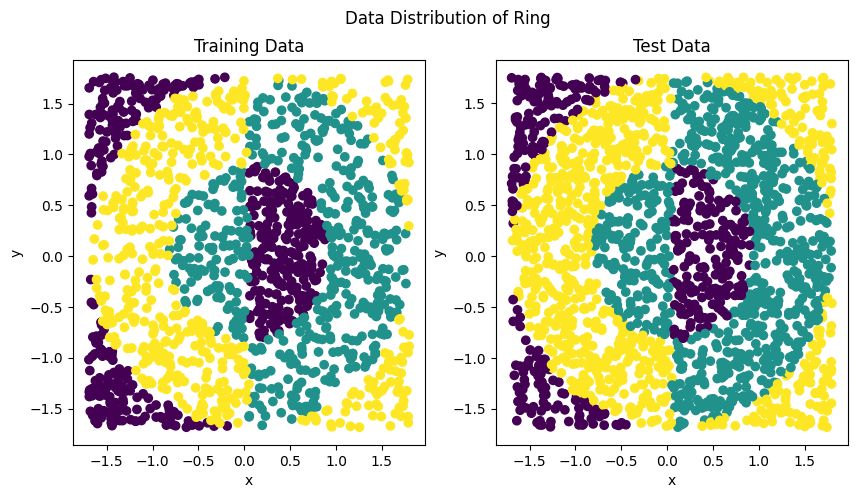

In [29]:
visualize_data_distribution(rings_train, rings_test, "Data Distribution of Ring")

In [4]:
x = rings_train[["x", "y"]].to_numpy()
y = rings_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [5]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 3, "softmax"))

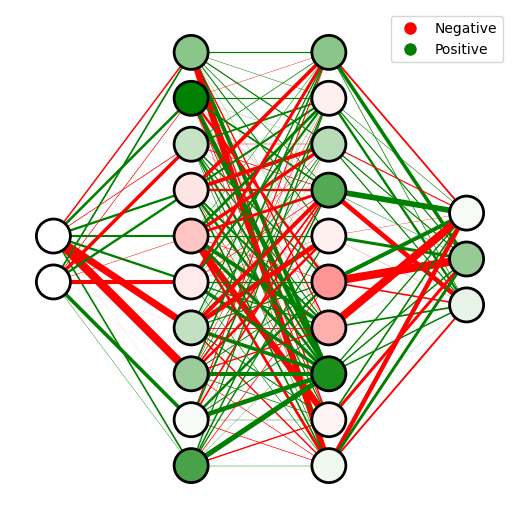

In [18]:
neural.visualize_network()

In [19]:
y_hat = neural.predict(x)
y_hat

array([[9.99992055e-01, 1.42815576e-37, 7.94471905e-06],
       [9.69895204e-01, 3.01047962e-02, 2.71575444e-13],
       [9.48244623e-01, 5.17553771e-02, 4.06533377e-13],
       ...,
       [2.60144244e-13, 1.05337402e-01, 8.94662598e-01],
       [6.37482481e-08, 4.73961591e-11, 9.99999936e-01],
       [7.15815098e-13, 1.94530318e-02, 9.80546968e-01]])

In [8]:
neural.predict_class(x)

array([[2],
       [2],
       [2],
       ...,
       [1],
       [0],
       [0]])

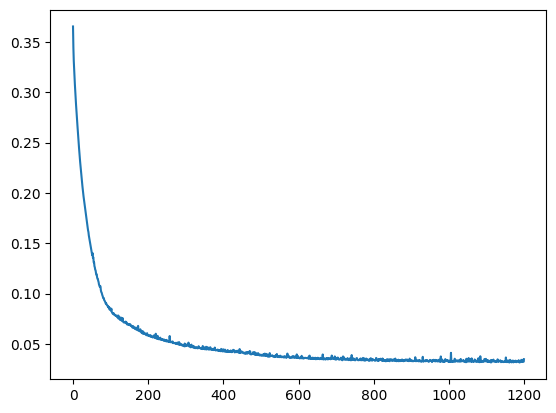

In [9]:
mse = neural.train(x, y, learning_rate=0.001, max_num_epoch=1000)
plt.plot(mse)

In [ ]:
neural.visualize_network()

In [10]:
rings_train["predicted"] = neural.predict_class(x)
rings_train["correct"] = rings_train["c"] == rings_train["predicted"]

rings_test["predicted"] = neural.predict_class(rings_test[["x", "y"]].to_numpy())
rings_test["correct"] = rings_test["c"] == rings_test["predicted"]

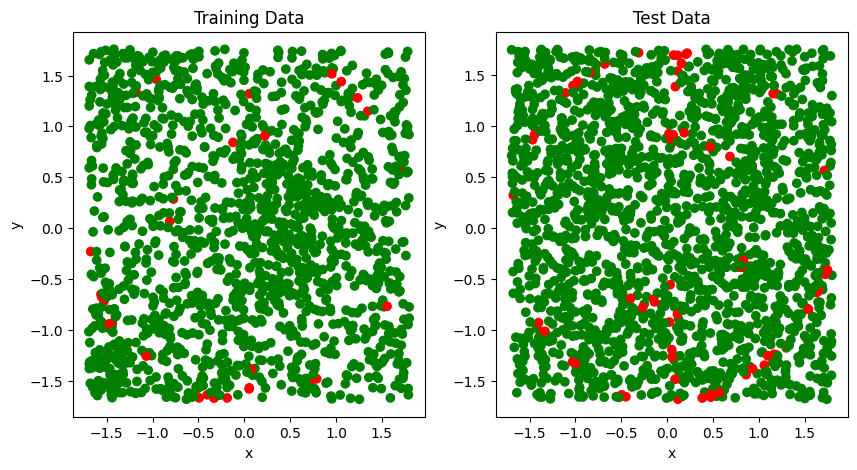

In [22]:
visualize_correctness(rings_train, rings_test)

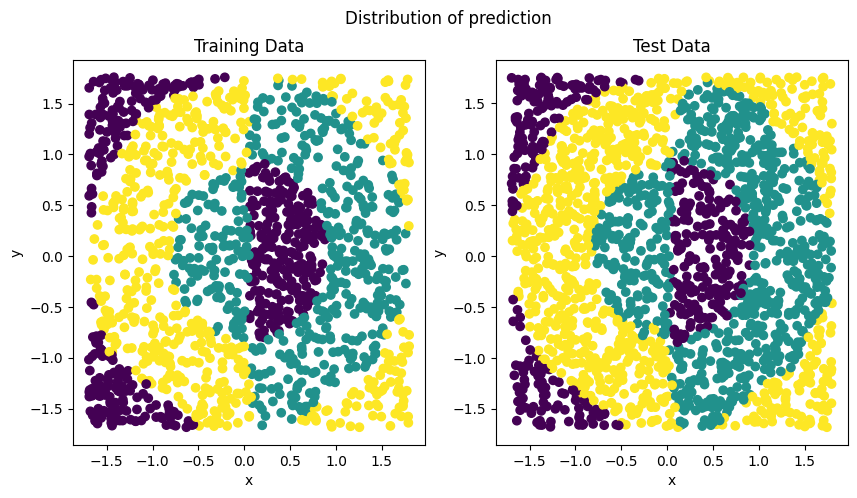

In [30]:
visualize_data_distribution(rings_train, rings_test, "Distribution of prediction", color_by="predicted")

# easy (0.99 f-score)

In [14]:
easy_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-training.csv"
)
easy_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-test.csv"
)

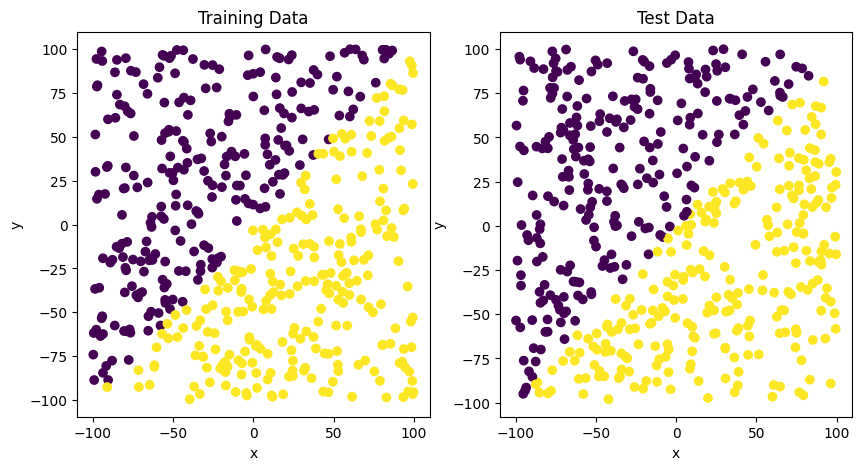

In [15]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(easy_train["x"], easy_train["y"], c=easy_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(easy_test["x"], easy_test["y"], c=easy_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# xor3 (0.99 f-score)

In [16]:
xor_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-training.csv"
)
xor_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-test.csv"
)

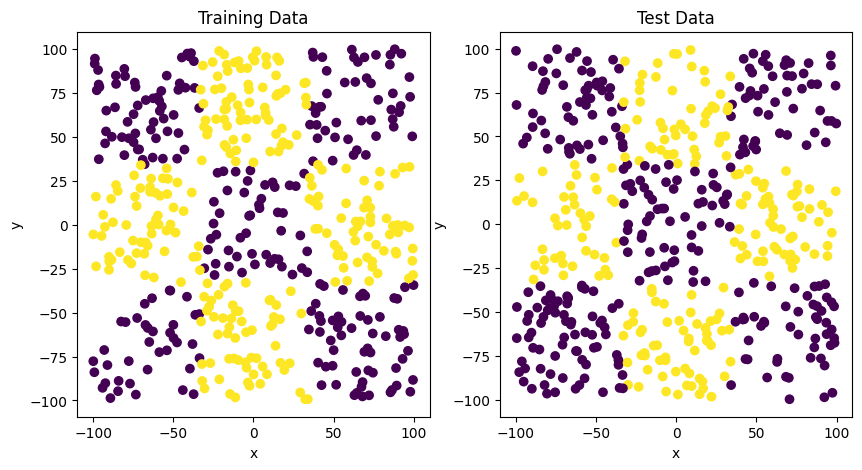

In [17]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(xor_train["x"], xor_train["y"], c=xor_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(xor_test["x"], xor_test["y"], c=xor_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()